# Load packages needed and creates the function to call the external C program

In [1]:
import os
import subprocess
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rcParams["figure.figsize"] = (15,10) #Size of the figures ploted, in inches
plt.rcParams.update({'font.size': 22}) #Font size for figures

def f(difu0,theta0,eta0):
    return [difu0,theta0,eta0]*(1+percent/100*(np.random.rand(3)-0.5))

def lamchi (ds,ths,thf):
    return float(subprocess.check_output([r'tllam.exe', file, str(ds), str(ths), str(thf), str(m), str(w0), str(v), str(l), str(df), str(cs), str(cf), str(dens), str(denf),str(ns), str(nf), str(E), str(coefexp), str(dndts), str(nu), str(qpen), str(qpar)],universal_newlines=True,stderr=subprocess.STDOUT).split()[0])

# Define constant parameters (for surrouding air) and the number of particles* to be used
### *The default is 4, and should work fine in most cases.

In [2]:
m=22.1 #ratio between probe and excitation beam radius
w0=57e-6 #excitation beam radius
v=2.07 #geometric parameter of the experiment
l=1.85e-3 #samples thickness
df=2.2e-5 #fluid thermal diffusivity
cs=810 #sample specific heat
cf=1005 #fluid specific heat
dens=2890 #sample specific mass
denf=1.18 #fluid specific mass
ns=1.63 #sample refractive index
nf=1 #fluid refractive index
E=72 #samples young modulus
coefexp=7.5 #samples thermal expansion coefficient
dndts=5.3 #samples dn/dt
nu=0.23 #samples poisson ratio
qpen=0.9e-3 #piezo-optic coefficient for perpendicular stress
qpar=0.09e-3 #piezo-optic coefficient for parallel stress

particles=4

# Define the initial guess
### You may estimate these value based in known properties of your sample. If the values are to far from the good ones, you will see after run the Particle Swarm Optimization

In [3]:
file='datatofit.dat'
difu0=5e-7
theta0=4
eta0=0
chi=1000
print('Initial Values')
difu0,theta0,eta0,chi

Initial Values


(5e-07, 4, 0, 1000)

# percent defines the "range of flight" allowed for the particles. 
#### Higher values increase the space of search and may require more evaluations. If your Swarm is composed of more particles, your chances will increase and less time would be needed. The code below will perform "kmax" evaluations until stop

Better parameters found
Chi^2=0.000591737, 4 combinations evaluated
Better parameters found
Chi^2=0.0005874836, 8 combinations evaluated
Better parameters found
Chi^2=0.0003214069, 12 combinations evaluated
Better parameters found
Chi^2=1.90466e-05, 16 combinations evaluated
Better parameters found
Chi^2=1.60254e-05, 20 combinations evaluated
The best fit parameters found are:
Sample´s Diffusivity= 5.317228739232711e-07
Samples Signal Amplitude= 4.330896764158691
Surrounding Fluid Signal Amplitude= 0.0
chi^2 value= 1.60254e-05


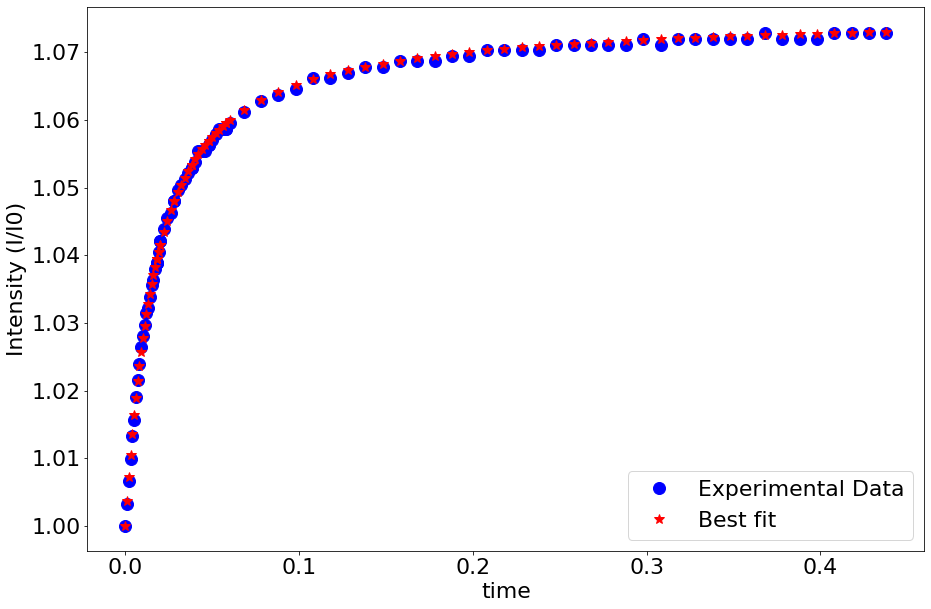

In [4]:
percent=10
k=0
kmax=5
while k<kmax:
    points=[]
    for i in range(particles):
        points.append(f(difu0,theta0,eta0))
    data=np.column_stack((points,[lamchi(points[i][0],points[i][1],points[i][2]) for i in range(particles)]))
    bestfit=data[np.argmin(np.transpose(data)[3])]
    k+=1
    if(bestfit[3]<chi):
        difu0=bestfit[0]
        theta0=bestfit[1]
        eta0=bestfit[2]
        chi=bestfit[3]
        print("Better parameters found")
    print("Chi^2="+str(bestfit[3])+", "+str(particles*k)+" combinations evaluated")

finalfit=np.loadtxt('result-'+str(bestfit[0])+'-'+str(bestfit[1])+'-datatofit.dat')
tofit=np.loadtxt('datatofit.dat')    

plt.plot(tofit.T[0],tofit.T[1],'o',markersize=12,label='Experimental Data',color='b')
plt.plot(finalfit.T[0],finalfit.T[1],'*',markersize=10,label='Best fit',color='r')
plt.xlabel('time')
plt.ylabel('Intensity (I/I0)')
plt.legend()

os.system('del result-*')

print('The best fit parameters found are:')
print('Sample´s Diffusivity= '+str(difu0))
print('Samples Signal Amplitude= '+str(theta0))
print('Surrounding Fluid Signal Amplitude= '+str(eta0))
print('chi^2 value= '+str(chi))

# After perform the fitting, the following command exports the "finalfit" ploted above to the file "fit.csv"

In [5]:
np.savetxt('fit.csv',finalfit)